A partir de los datos ya analizados para la entrega 3, se toma el dataset trabajo como imput para esta instancia.


**Introducción**

In [2]:
#Importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score



In [3]:
#importamos el csv
df = pd.read_csv('https://raw.githubusercontent.com/GabiMiranda05/Proyecto-Ingenias/refs/heads/main/Tercera-Entrega/datos_procesados.csv')

In [4]:
df.shape

(5283, 133)

In [5]:
df.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,age_certification_ord,action,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,1976,113,0.0,8.3,795222.0,27.612,8.2,0,8,0,...,0,0,1,0,0,0,0,0,0,0
1,1975,91,0.0,8.2,530877.0,18.216,7.8,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,0.0,8.0,392419.0,17.505,7.8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,1973,133,0.0,8.1,391942.0,95.337,7.7,0,8,0,...,0,0,1,0,0,0,0,0,0,0
4,1969,30,4.0,8.8,72895.0,12.919,8.3,1,7,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocesado de datos



## Identificación de variables

In [7]:
#copiamos el dataframe
df_cod=df.copy()

In [8]:
df_cod.shape

(5283, 133)

In [9]:
df_cod.columns

Index(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'type_enc', 'age_certification_ord',
       'action',
       ...
       'TZ', 'UA', 'US', 'UY', 'VA', 'VE', 'VN', 'XX', 'ZA', 'ZW'],
      dtype='object', length=133)

## Evaluación y procesamiento de nulos





<Axes: >

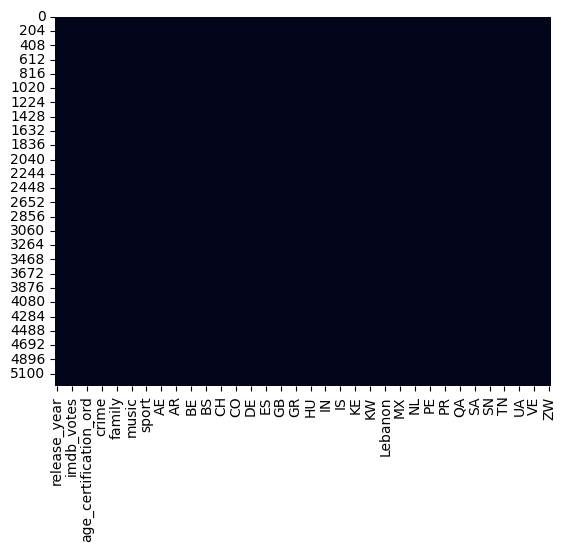

In [20]:
#Verifico valores faltantes
sns.heatmap(df.isnull(), cbar=False)

In [21]:
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isna().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df.dtypes
df_info_nulos.sort_values(by='Porcentaje', ascending=False)

,Cantidad,Porcentaje,Tipo de dato
release_year,0,0.0,int64
runtime,0,0.0,int64
seasons,0,0.0,float64
imdb_score,0,0.0,float64
imdb_votes,0,0.0,float64
...,...,...,...
VE,0,0.0,int64
VN,0,0.0,int64
XX,0,0.0,int64
ZA,0,0.0,int64


Esta ok, no hay valores faltantes ya que el dataset estaba previamente trabajado. Ahora vamos a normalizar el modelo para poder lograr un mejor entrenamiento para la identificación de clusters

## Estandarización

In [10]:
# Selecciono las columnas a normalizar
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Inicializo MinMaxScaler
scaler = MinMaxScaler()

# Aplico normalización
df_normalizado = df.copy() # Creamos una copia para evitar modificar el dataset original
df_normalizado[numerical_cols] = scaler.fit_transform(df_normalizado[numerical_cols])

df_normalizado.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,age_certification_ord,action,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,...,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,0.911304,0.331930,0.018965,0.621413,0.010289,0.012505,0.646034,0.355101,0.403060,0.193640,...,0.000757,0.000757,0.407344,0.001325,0.000189,0.000189,0.000379,0.004354,0.007004,0.000189
std,0.106465,0.166113,0.046261,0.143325,0.038359,0.038880,0.124747,0.478589,0.399150,0.395187,...,0.027508,0.027508,0.491386,0.036380,0.013758,0.013758,0.019455,0.065844,0.083402,0.013758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.898551,0.184549,0.000000,0.530864,0.000228,0.001549,0.577778,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.942029,0.364807,0.000000,0.629630,0.001005,0.004030,0.655556,0.000000,0.363636,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.971014,0.446352,0.023810,0.728395,0.004449,0.009710,0.722222,1.000000,0.818182,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Aprendizaje no supervisado
Ahora lo que vamos a entrenar el modelo usando los datos de dataset para encontrar caracteristicas escondidas en los datos que permitan hacer predicciones. No se busca predecir una etiqueta sino encontrar los patrones en el conjunto de datos.

## Reducción de dimensionalidad #ver esto no me salió

Como el dataset es muy grande, en primer lugar debemos reconocer cuáles son las features de mayor importancia asi reducimos la cantidad eliminando las de menor importancia. Para esto realizaremos una selección de columnas en base a permutation importance y luego un algoritmos de reducción de dimensionalidad.

In [19]:
# Separar los conjuntos para entrenamiento y testeo
y = #columna objetivo
X = #el resto de las columnas
X_train_pi, X_test_pi, y_train_pi, y_test_pi = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'imdb_score' is not defined

## Modelo 1:K-means #incompleto, falta terminar

Empezamos probando el dataset con el método K-means: debemos encontrar un valor de K de centroides, tal que la distancia entre los centroides y los datos sea la menor posible.

In [15]:
# Especificamos el numero adecuado de clusters en cada caso
first_kmeans = KMeans(n_clusters=20, random_state=0)
sec_kmeans = KMeans(n_clusters=4, random_state=0)
thr_kmeans = KMeans(n_clusters=7, random_state=0)

In [20]:
#entremos los modelos sin pasarle las etiquetas
first_kmeans.fit(df_normalizado)
sec_kmeans.fit(df_normalizado)
thr_kmeans.fit(df_normalizado)

KMeans(n_clusters=7, random_state=0)

In [13]:
X1, y1 = make_blobs(n_samples=1000, centers=3, cluster_std=0.5, n_features=2, random_state=0)

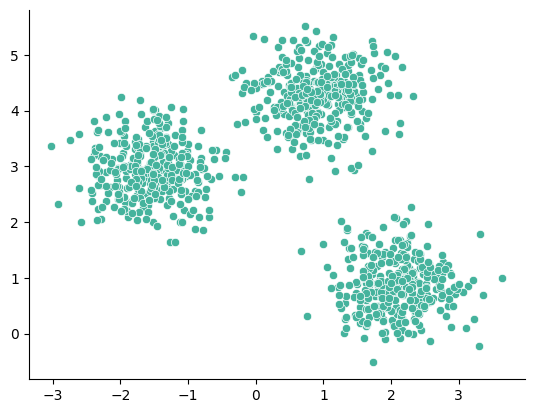

In [14]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], color='#45B39D')
sns.despine()
plt.show()

## Modelo 2: DBSCAN

In [21]:
Xd=df_normalizado.values
db=DBSCAN(eps=0.3, min_samples=10)
labels=db.fit_predict(Xd)

In [22]:
labels_db=db.labels_
n_clusters=len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise=list(labels_db).count(-1)

In [24]:
print('Número estimado de clusters: %d' % n_clusters)
 print('Número estimado de puntos de ruido: %d' % n_noise)

Número estimado de clusters: 39
Número estimado de puntos de ruido: 4264


Estos valores nos dan 39 clusters y 4264 puntos de ruido, lo cual lo graficamos a continuación

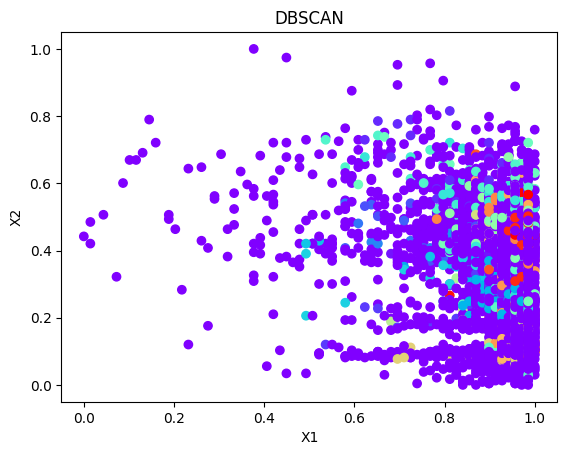

In [26]:
plt.scatter(Xd[:,0], Xd[:,1], c=labels_db, cmap='rainbow')
#agregamos etiquetas y título
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('DBSCAN')
plt.show()

Ahora buscamos el mejor valor para epsilon mediante el Método del codo

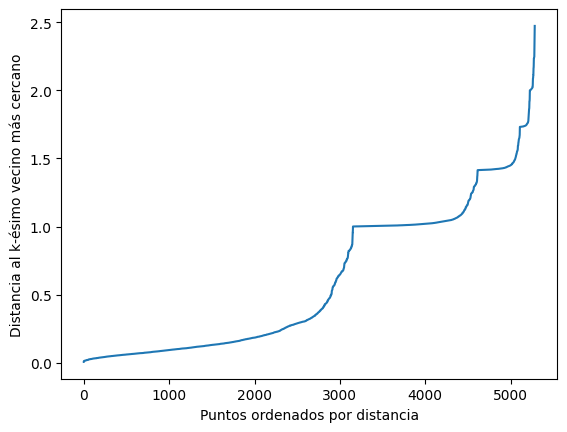

In [27]:
from sklearn.neighbors import NearestNeighbors

# Calcula las distancias a los k vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=5)  # min_samples = 5
neigh.fit(Xd)
distances, indices = neigh.kneighbors(Xd)

# Ordena las distancias y grafica
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al k-ésimo vecino más cercano")
plt.show()

Dada la información que muestra el gráfico, probamos con epsilon de 1

In [28]:
Xd = df_normalizado.values
db = DBSCAN(eps=1, min_samples=10)
labels = db.fit_predict(Xd)

In [29]:
labels_db = db.labels_

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

In [30]:
print('Número estimado de clusters: %d' % n_clusters_db)
print('Número estimado de puntos de ruido: %d' % n_noise_db)

Número estimado de clusters: 51
Número estimado de puntos de ruido: 3894


Acá obtuvimos 51 clusters con 3894 putnos de ruido

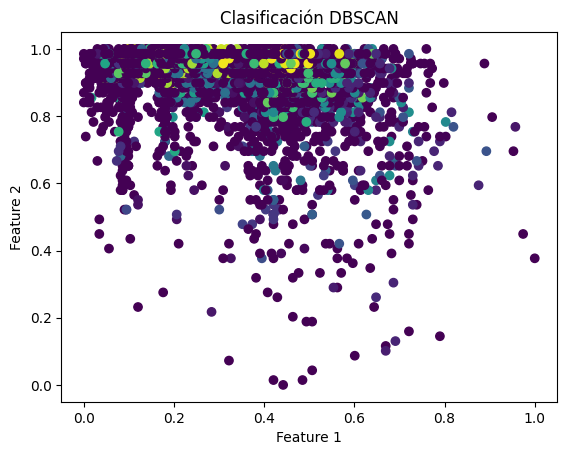

In [31]:
# Creamos el gráfico de dispersión
plt.scatter(Xd[:, 1], Xd[:, 0], c=labels, cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación DBSCAN')  # Título del gráfico

plt.show()  # Muestra el gráfico

Probamos ahora graficando en 3d

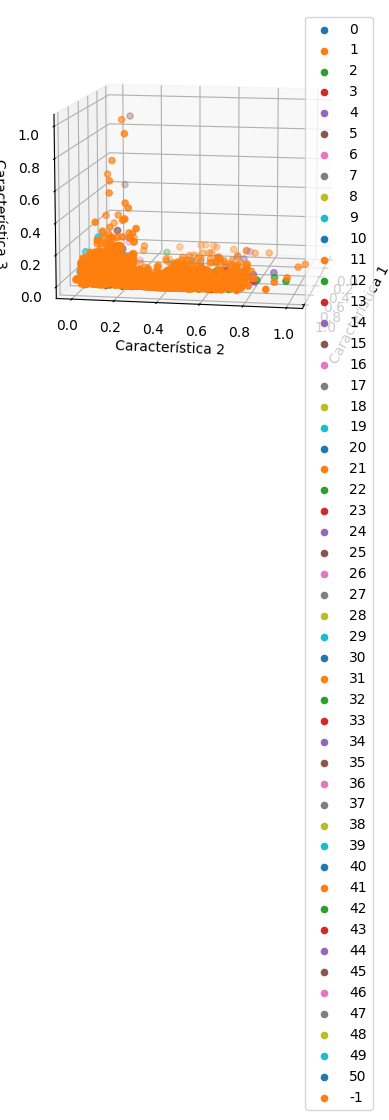

In [32]:
from mpl_toolkits.mplot3d import Axes3D

X = df_normalizado.iloc[:, :3].values

# Crea una figura y un subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos, coloreando según el cluster
unique_labels = set(labels_db)
for label in unique_labels:
    # Filtra los puntos de cada cluster
    cluster_points = X[labels_db == label]

    # Grafica los puntos del cluster
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=label)

# Configura los ejes y la leyenda
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.legend()
ax.view_init(elev=10, azim=10)
# Muestra la gráfica
plt.show()

# Conclusión